In [2]:
!pip install mediapipe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.9/33.9 MB 44.2 MB/s eta 0:00:00


In [34]:
import cv2
import numpy as np
import mediapipe as mp
import matplotlib.pyplot as plt

In [43]:
#0 type model: Will be able to detect the faces within the range of 2 meters from the camera.
#1 type model: Will be able to detect the faces within the range of 5 meters. Though the default value is 0.
mp_face_detection = mp.solutions.face_detection

face_detection = mp_face_detection.FaceDetection(model_selection=1, min_detection_confidence=0.5)

mp_drawing = mp.solutions.drawing_utils

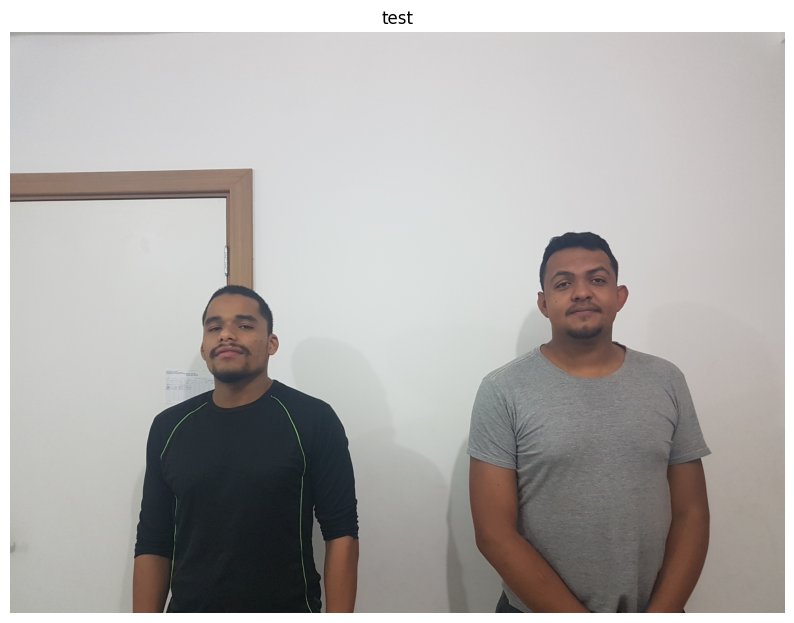

In [44]:
sample_img = cv2.imread('1.jpg')

plt.figure(figsize = [10, 10])

plt.title("test");plt.axis('off');plt.imshow(sample_img[:,:,::-1]);plt.show()

In [45]:
face_detection_results = face_detection.process(sample_img[:,:,::-1])

if face_detection_results.detections:
    
    for face_no, face in enumerate(face_detection_results.detections):
        
        print(f'FACE NUMBER: {face_no+1}')
        print('==============================')
        
        print(f'FACE CONFIDENCE: {round(face.score[0], 2)}')
        
        face_data = face.location_data

        print(f'\nFACE BOUNDING BOX:\n{face_data.relative_bounding_box}')
        
        for i in range(2):

            print(f'{mp_face_detection.FaceKeyPoint(i).name}:')
            print(f'{face_data.relative_keypoints[mp_face_detection.FaceKeyPoint(i).value]}') 

FACE NUMBER: 1
FACE CONFIDENCE: 0.92

FACE BOUNDING BOX:
xmin: 0.6898555159568787
ymin: 0.3963405191898346
width: 0.09896594285964966
height: 0.1319769322872162

RIGHT_EYE:
x: 0.7171632647514343
y: 0.4351638853549957

LEFT_EYE:
x: 0.7620588541030884
y: 0.43570467829704285

FACE NUMBER: 2
FACE CONFIDENCE: 0.87

FACE BOUNDING BOX:
xmin: 0.23949135839939117
ymin: 0.4774908125400543
width: 0.09031020104885101
height: 0.12041911482810974

RIGHT_EYE:
x: 0.26454678177833557
y: 0.5170841217041016

LEFT_EYE:
x: 0.3017382025718689
y: 0.5116441249847412



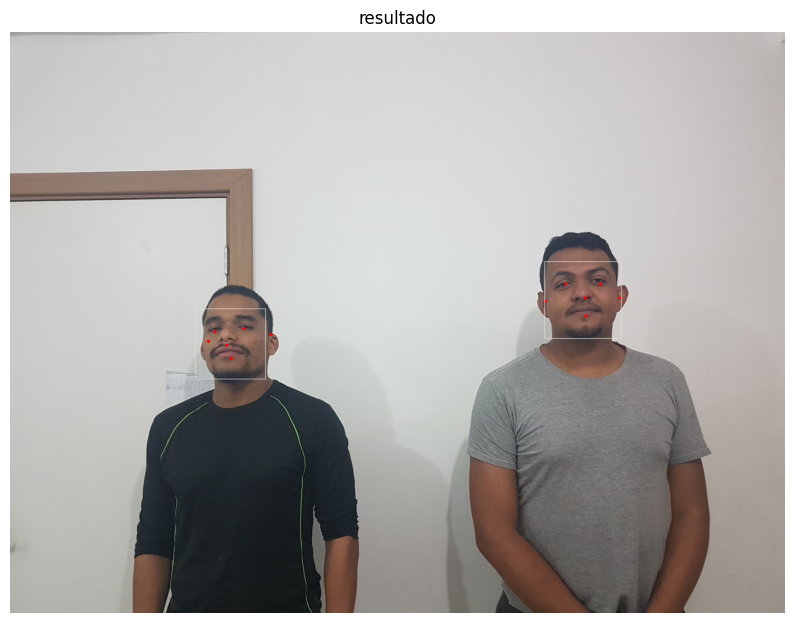

In [51]:
img_copy = sample_img[:,:,::-1].copy()

if face_detection_results.detections:
    
    for face_no, face in enumerate(face_detection_results.detections):

        mp_drawing.draw_detection(image=img_copy, detection=face, 
                                 keypoint_drawing_spec=mp_drawing.DrawingSpec(color=(255, 0, 0),
                                                                              thickness=5,
                                                                              circle_radius=5))
fig = plt.figure(figsize = [10, 10])

plt.title("resultado");plt.axis('off');plt.imshow(img_copy);plt.show()